# **EMAIL SPAM DETECTION USING MACHINE LEARNING**

**Download Dataset here:** [spam.csv](https://drive.google.com/file/d/1ctbKxUgsCpRxPeVO9cAlp6ywy0AOEM9d/view?usp=share_link)

# Importing required libraries
---

In [1]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

import seaborn as sns
import matplotlib.pyplot as plt

from tqdm.auto import tqdm
import time

Mounted at /content/drive


# Data Loading
---

In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [4]:
df.drop(['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)

In [5]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.tail()

,v1,v2
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


# EDA
---

# 1. Handling Null Values

In [8]:
df.isna().any()

v1    False
v2    False
dtype: bool

In [9]:
df.isna().sum()

v1    0
v2    0
dtype: int64

# 2. Handling Duplicate Values

In [8]:
df['v2'].nunique()

5169

In [9]:
df.shape

(5572, 2)

In [11]:
df['v2'].drop_duplicates(inplace = True)

In [12]:
df.shape

(5572, 2)

In [13]:
df

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will Ì_ b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


# 3. Class Distributions

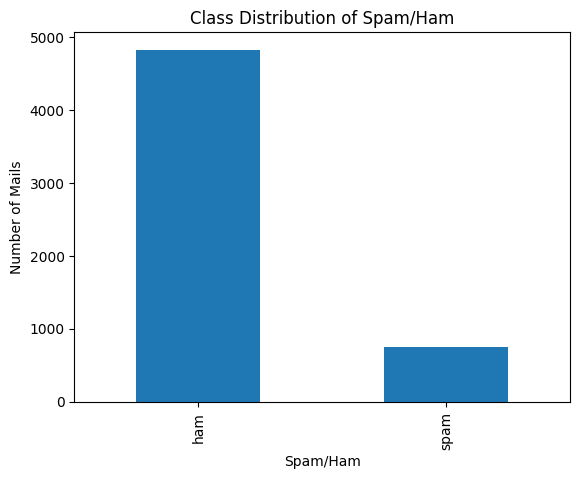

In [14]:
# Create a bar plot of the class distribution
class_counts = df['v1'].value_counts()
class_counts.plot(kind='bar')
plt.title('Class Distribution of Spam/Ham')
plt.xlabel('Spam/Ham')
plt.ylabel('Number of Mails')
plt.show()

# Word Count

In [15]:
from collections import Counter
import re

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
# Concatenate all tweet texts into a single string
all_text = ' '.join(df['v2'].values)
print(all_text)
# Remove URLs, mentions, and hashtags from the text
all_text = re.sub(r'http\S+', '', all_text)
all_text = re.sub(r'@\S+', '', all_text)
all_text = re.sub(r'#\S+', '', all_text)

ham" Not from this campus. Are you in the library? The affidavit says  &lt;#&gt;  E Twiggs St, division g, courtroom  &lt;#&gt; , &lt;TIME&gt;  AM. I'll double check and text you again tomorrow How will I creep on you now? ;_; Tell your friends what you plan to do on Valentines day @ &lt;URL&gt; If I get there before you after your ten billion calls and texts so help me god Purity of friendship between two is not about smiling after reading the forwarded message..Its about smiling just by seeing the name. Gud evng musthu I've told him that i've returned it. That should i re order it. House-Maid is the murderer, coz the man was murdered on  &lt;#&gt; th January.. As public holiday all govt.instituitions are closed,including post office.. Depends on where u going lor. And smile for me right now as you go and the world will wonder what you are smiling about and think your crazy and keep away from you ... *grins* FreeMsg>FAV XMAS TONES!Reply REAL Lil fever:) now fine:) I think it's all sti

In [17]:
# Split the text into individual words
words = all_text.split()

In [18]:
words

['Go',
 'until',
 'jurong',
 'point,',
 'crazy..',
 'Available',
 'only',
 'in',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet...',
 'Cine',
 'there',
 'got',
 'amore',
 'wat...',
 'Ok',
 'lar...',
 'Joking',
 'wif',
 'u',
 'oni...',
 'Free',
 'entry',
 'in',
 '2',
 'a',
 'wkly',
 'comp',
 'to',
 'win',
 'FA',
 'Cup',
 'final',
 'tkts',
 '21st',
 'May',
 '2005.',
 'Text',
 'FA',
 'to',
 '87121',
 'to',
 'receive',
 'entry',
 'question(std',
 'txt',
 "rate)T&C's",
 'apply',
 "08452810075over18's",
 'U',
 'dun',
 'say',
 'so',
 'early',
 'hor...',
 'U',
 'c',
 'already',
 'then',
 'say...',
 'Nah',
 'I',
 "don't",
 'think',
 'he',
 'goes',
 'to',
 'usf,',
 'he',
 'lives',
 'around',
 'here',
 'though',
 'FreeMsg',
 'Hey',
 'there',
 'darling',
 "it's",
 'been',
 '3',
 "week's",
 'now',
 'and',
 'no',
 'word',
 'back!',
 "I'd",
 'like',
 'some',
 'fun',
 'you',
 'up',
 'for',
 'it',
 'still?',
 'Tb',
 'ok!',
 'XxX',
 'std',
 'chgs',
 'to',
 'send,',
 'å£1.50',
 'to',
 'rcv',
 

In [19]:
# Remove stop words
stop_words = set(stopwords.words('english'))
words = [word for word in words if not word in stop_words]

In [20]:
words

['Go',
 'jurong',
 'point,',
 'crazy..',
 'Available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'buffet...',
 'Cine',
 'got',
 'amore',
 'wat...',
 'Ok',
 'lar...',
 'Joking',
 'wif',
 'u',
 'oni...',
 'Free',
 'entry',
 '2',
 'wkly',
 'comp',
 'win',
 'FA',
 'Cup',
 'final',
 'tkts',
 '21st',
 'May',
 '2005.',
 'Text',
 'FA',
 '87121',
 'receive',
 'entry',
 'question(std',
 'txt',
 "rate)T&C's",
 'apply',
 "08452810075over18's",
 'U',
 'dun',
 'say',
 'early',
 'hor...',
 'U',
 'c',
 'already',
 'say...',
 'Nah',
 'I',
 'think',
 'goes',
 'usf,',
 'lives',
 'around',
 'though',
 'FreeMsg',
 'Hey',
 'darling',
 '3',
 "week's",
 'word',
 'back!',
 "I'd",
 'like',
 'fun',
 'still?',
 'Tb',
 'ok!',
 'XxX',
 'std',
 'chgs',
 'send,',
 'å£1.50',
 'rcv',
 'Even',
 'brother',
 'like',
 'speak',
 'me.',
 'They',
 'treat',
 'like',
 'aids',
 'patent.',
 'As',
 'per',
 'request',
 "'Melle",
 'Melle',
 '(Oru',
 'Minnaminunginte',
 'Nurungu',
 "Vettam)'",
 'set',
 'callertune',
 'Callers

In [21]:
# Count the frequency of each word
word_counts = Counter(words)
top_words = word_counts.most_common(100)
top_words

[('I', 1466),
 ('u', 692),
 ('2', 453),
 ('call', 376),
 ('get', 326),
 ('U', 299),
 ('ur', 293),
 ("I'm", 286),
 ('&lt;', 276),
 ('You', 263),
 ('4', 249),
 ('.', 235),
 ('go', 234),
 ('know', 224),
 ('like', 222),
 ('got', 204),
 ('come', 198),
 ('?', 187),
 ('...', 163),
 ('want', 157),
 ('Call', 155),
 ('time', 154),
 ('send', 150),
 ('going', 142),
 ('need', 141),
 ('n', 137),
 ("I'll", 137),
 ('How', 137),
 ('still', 134),
 ('If', 133),
 ('one', 132),
 ('But', 131),
 ('No', 126),
 ('text', 126),
 ('Just', 119),
 ('We', 119),
 ('So', 118),
 ('love', 114),
 ('good', 114),
 ('think', 113),
 ('Do', 113),
 ('see', 113),
 ('r', 113),
 ('back', 111),
 ('home', 107),
 ('&', 107),
 ('Ì_', 105),
 ('tell', 104),
 ('Your', 104),
 ('take', 101),
 ('What', 101),
 ('day', 101),
 ('free', 99),
 ('My', 99),
 ('And', 98),
 ('Ok', 97),
 ('me.', 97),
 ('dont', 97),
 ('The', 95),
 ('mobile', 94),
 ('A', 92),
 ("i'm", 91),
 ('FREE', 90),
 ('make', 90),
 ('new', 89),
 ('-', 88),
 ('phone', 88),
 ('late

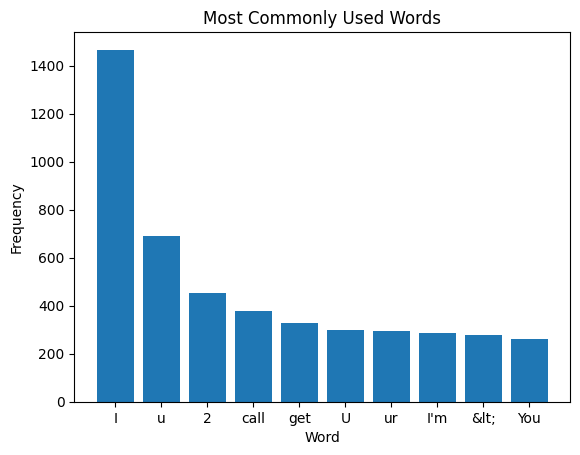

In [22]:
# Create a bar chart of the most common words
top_words = word_counts.most_common(10) # Change the number to show more/less words
x_values = [word[0] for word in top_words]
y_values = [word[1] for word in top_words]
plt.bar(x_values, y_values)
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.title('Most Commonly Used Words')
plt.show()

# Natural Language Processing
---

# 1. Data Cleaning

In [23]:
# Clean the data
def clean_text(text):
    # Remove HTML tags
    text = re.sub('<.*?>', '', text)
    # Remove non-alphabetic characters and convert to lowercase
    text = re.sub('[^a-zA-Z]', ' ', text).lower()
    # Tokenize the text
    words = nltk.word_tokenize(text)
    # Remove stopwords
    words = [w for w in words if w not in stopwords.words('english')]
    # Stem the words
    stemmer = PorterStemmer()
    words = [stemmer.stem(w) for w in words]
    # Join the words back into a string
    text = ' '.join(words)
    return text

In [24]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\moham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [25]:
%%time

tqdm.pandas()

df['cleaned_text'] = df['v2'].progress_apply(clean_text)

  0%|          | 0/5572 [00:00<?, ?it/s]

CPU times: total: 8.66 s
Wall time: 22 s


# 2. Feature Extraction

In [56]:
df['cleaned_text'][0]

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [62]:
# Create the Bag of Words model
cv = CountVectorizer(max_features=5000)
X = cv.fit_transform(df['cleaned_text']).toarray()
y = df['v1']
from joblib import dump

# Assuming 'cv' is your CountVectorizer instance after fitting
dump(cv, 'count_vectorizer.joblib')


# dd=cv.fit_transform(df["cleaned_text"][:3]).toarray()
# print(dd)

['count_vectorizer.joblib']

In [29]:
X.shape

(5572, 5000)

In [30]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Classification Model
---


# 1. Logistic Regression Model

In [31]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
# train a Logistic Regression Model
clf = LogisticRegression()

In [59]:
from joblib import dump

clf.fit(X_train, y_train)
dump(clf, 'logistic_regression_model.joblib')


['logistic_regression_model.joblib']

# 2. Predictions

In [60]:
# evaluate the classifier on the test set
from joblib import load
clfss = load('logistic_regression_model.joblib')

s=X_test[0].reshape(1, -1)
y_pred = clfss.predict(s)

In [61]:
y_pred

array(['ham'], dtype=object)

# 3. Accuracy

In [36]:
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)

Accuracy: 0.9775784753363229


# 4. Confusion Matrix

<Axes: >

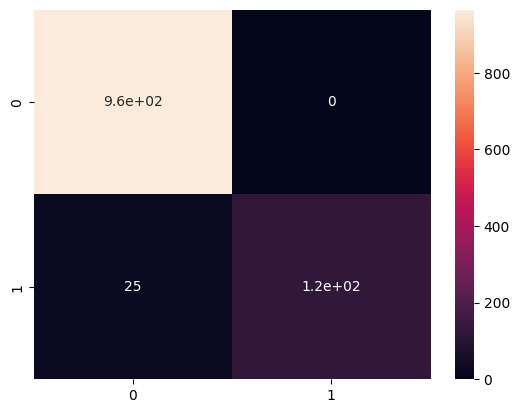

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

import seaborn as sns
sns.heatmap(cm, annot=True)

In [38]:
cm

array([[965,   0],
       [ 25, 125]], dtype=int64)

# 5. Classification Report

In [43]:
from sklearn.metrics import classification_report
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

         ham       0.97      1.00      0.99       965
        spam       1.00      0.83      0.91       150

    accuracy                           0.98      1115
   macro avg       0.99      0.92      0.95      1115
weighted avg       0.98      0.98      0.98      1115



In [63]:
from joblib import load
from sklearn.feature_extraction.text import CountVectorizer

# Example new email data
new_email = ["I want to go the school"]

# Preprocess the new email data
cleaned_new_email = clean_text(new_email[0])  # Assuming `clean_text` is your cleaning function

# Load the CountVectorizer and the model
cv = load('count_vectorizer.joblib')  # Make sure you've saved the fitted CountVectorizer previously
clf = load('logistic_regression_model.joblib')

# Transform the new email data to the same feature space
new_email_features = cv.transform([cleaned_new_email]).toarray()

# Make a prediction
prediction = clf.predict(new_email_features)

# Output prediction
print("Spam" if prediction[0] == 1 else "Not Spam")


Not Spam
